## Student Performance Indicator

### Life cycle of ML project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* EDA
* Data Pre-Processing
* Model Training
* Choose best model

#### 1) Problem Statement

* This project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test Preparation course.

#### 2) Data Collection

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download
* The dataset consists of 8 column and 1000 rows

#### 2.1 Import Data and Required Packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv(r'C:\Users\RamyaBharathi\repos\mlproject\notebook\data\StudentsPerformance.csv')

##### Show Top5 Records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of the dataset

In [5]:
df.shape

(1000, 8)

##### 2.2 Dataset Information

* gender : sex of students -> (Male/Female)
* race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
* parental level of education : Parents Final Education -> (Bachelor's Degree, Some college, Master's degree, associate's degree, high school, some high school)
* lunch : having lunch before test (standard, free/reduced)
* test preparation course : completed or not completed before test
* math score
* reading score
* writing score

#### 3. Data Checks to perform

* Check Missing values
* Check Duplicates
* Check Datatypes
* Check the number of unique values of each column
* Check statistics of dataset
* Check various categories present in the different categorical columns

##### 3.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset.

##### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset.

##### 3.3 Check Datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 3.4 Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### 3.5 Check statistics of dataset

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight

* From above description of numerical data, all means are closer to each other - between 66 and 68.5
* All Standard Deviation are also close - between 14.6 and 15.19
* While there is a minimum score of 0 for math, for writing mininmum score is much higher = 10 and for reading mininmum score is 17 which is highest of all.

##### 3.6 Check various categories present in the different categorical columns

In [11]:
for i in df.select_dtypes(include=['object']).columns:
    print(f"Categories in '{i}' variable : {df[i].unique()}")
    print('------------------------------------------')

Categories in 'gender' variable : ['female' 'male']
------------------------------------------
Categories in 'race/ethnicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
------------------------------------------
Categories in 'parental level of education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------------------------------
Categories in 'lunch' variable : ['standard' 'free/reduced']
------------------------------------------
Categories in 'test preparation course' variable : ['none' 'completed']
------------------------------------------


##### 3.7 Exploring Data

In [12]:
print(f'We have {len(df.select_dtypes(exclude=['object']).columns)} numerical features : {df.select_dtypes(exclude=['object']).columns.to_list()}')
print(f'We have {len(df.select_dtypes(include=['object']).columns)} categorical features : {df.select_dtypes(include=['object']).columns.to_list()}')

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


##### 3.8 Adding columns for 'Total Score' and 'Average

In [13]:
df['total score'] = df['math score']+df['reading score']+df['writing score']
df['average'] = (df['total score']/3).round(2)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [14]:
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()


print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_20 = df[df['reading score']<=20]['average'].count()
writing_less_20 = df[df['writing score']<=20]['average'].count()
math_less_20 = df[df['math score']<=20]['average'].count()


print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


##### Insights

* From above values we get students have performed the worst in Maths
* Best performance is in Reading section

#### 4. Exploring Data (Visualization)

##### 4.1 Visualize average score distribution to make som conclusion.

* Histogram
* Kernel Distribution Function(KDE)

##### 4.1.1 Histogram & KDE

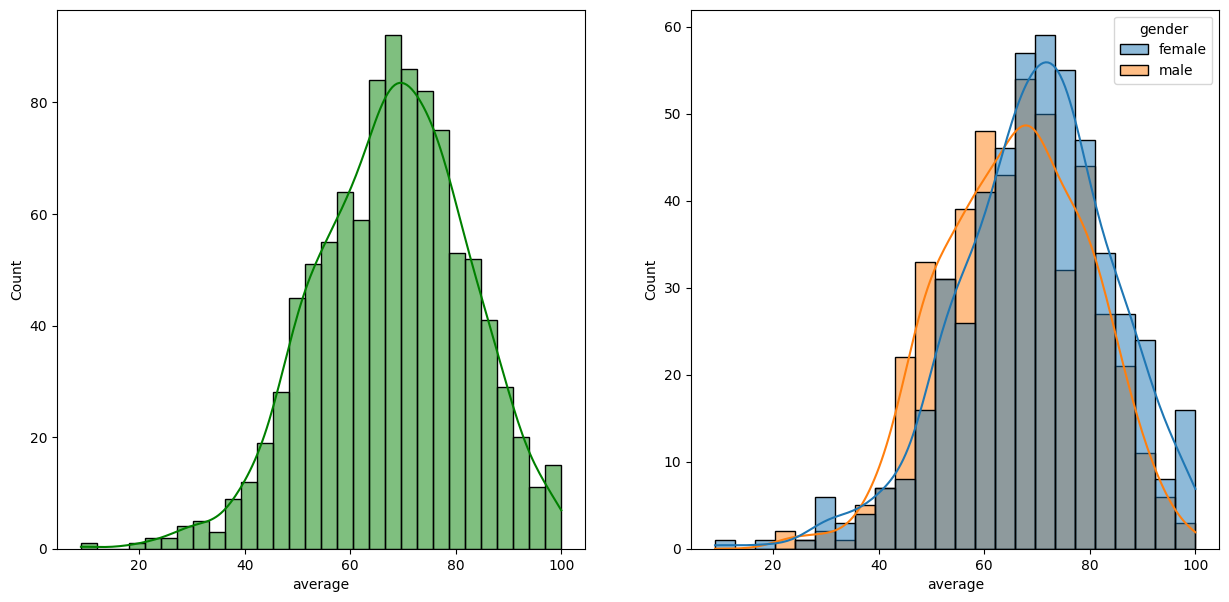

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

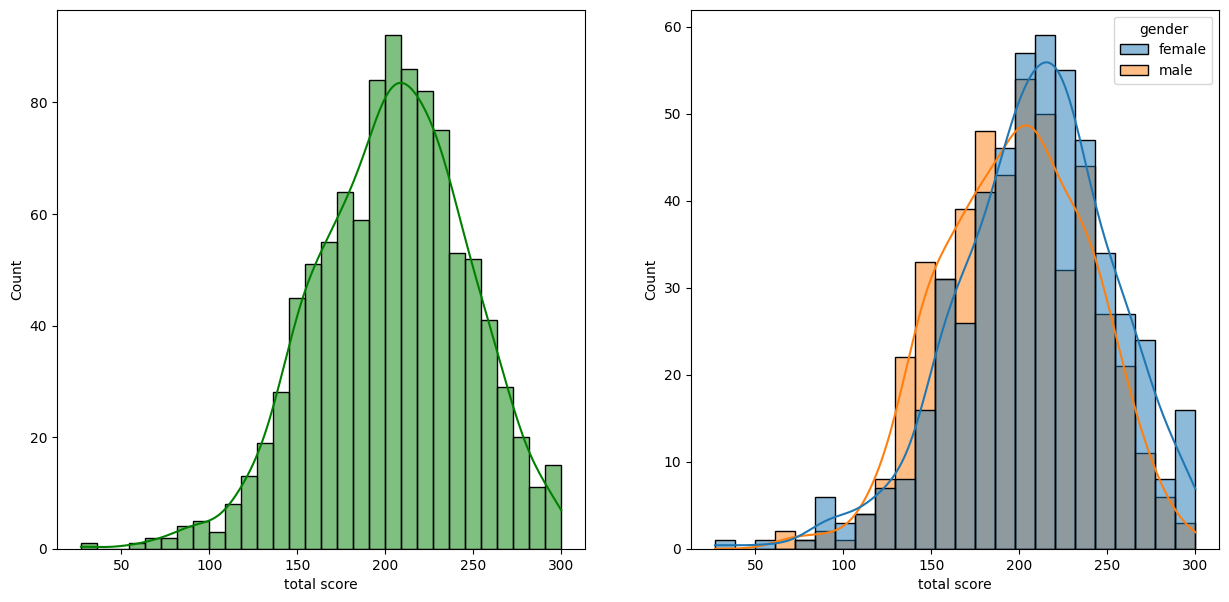

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

##### Insights

* Female students tend to perform well compared to male students

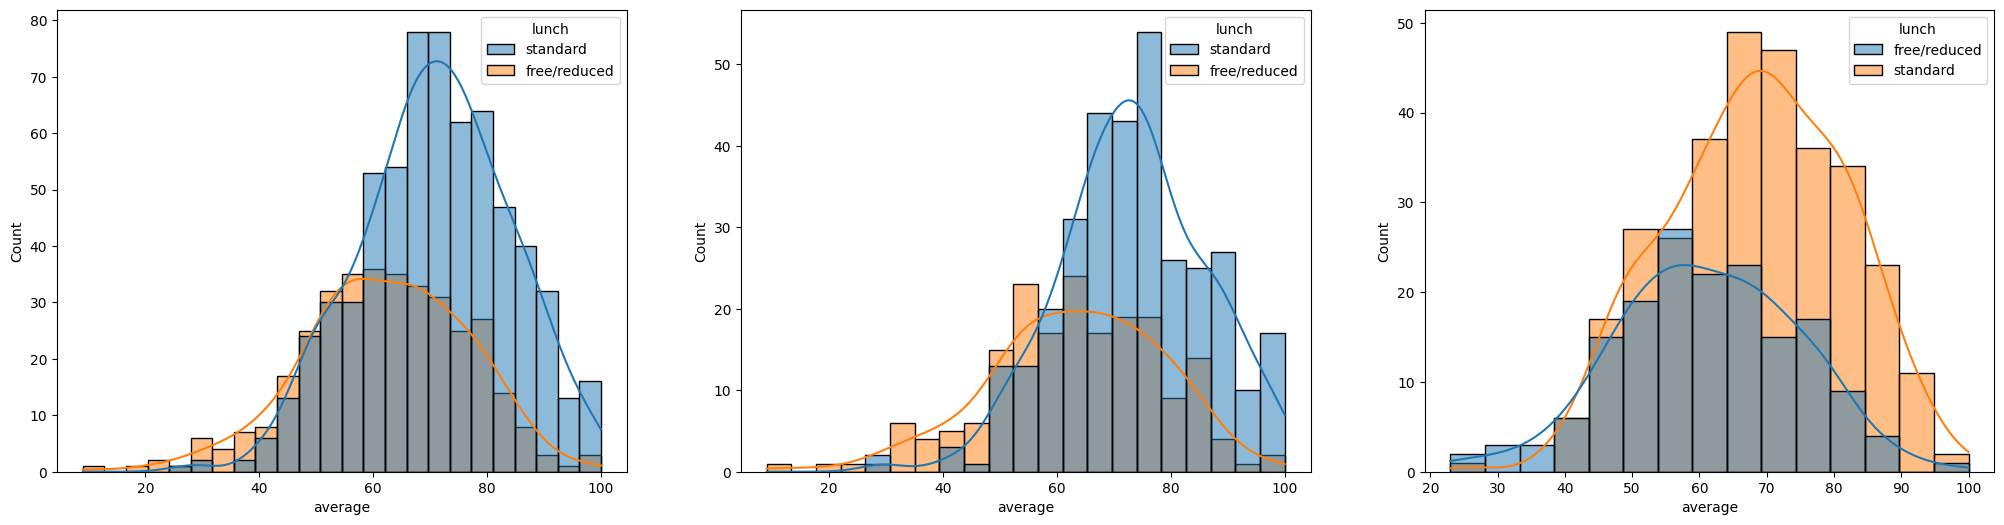

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

##### Insights

* Standard lunch helps perform well in exams
* Standard lunch helps perform well in exams be it a male or a female

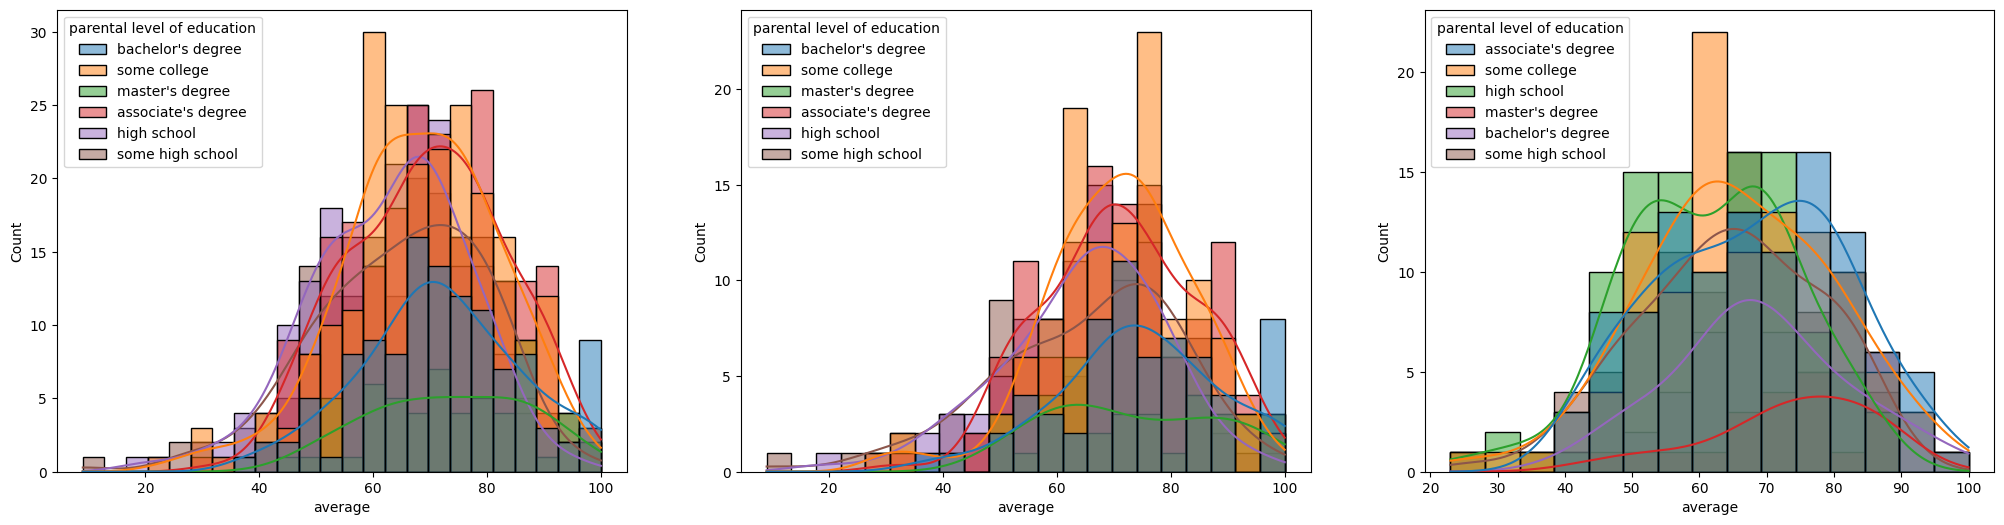

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

##### Insights

* In general parents eductaion doesn't help students perform well in exam
* 2nd plot shows that parents whose education is of associate's degree or master's degree thair male child tend to perform well in exam
* #rd plot we can see there is no effect of parents education on femal students.

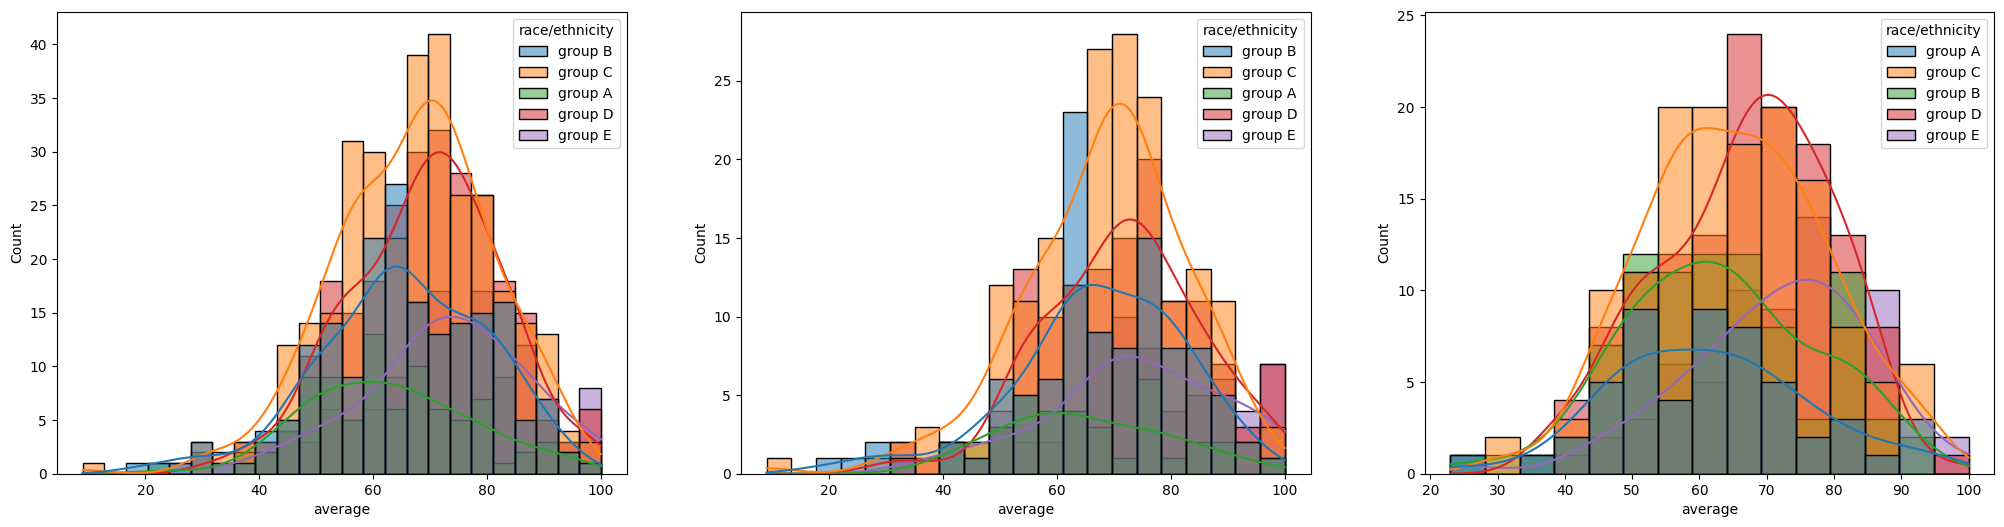

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

##### Insights

* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

#### 4.2 Maximum score of students in all three subjects

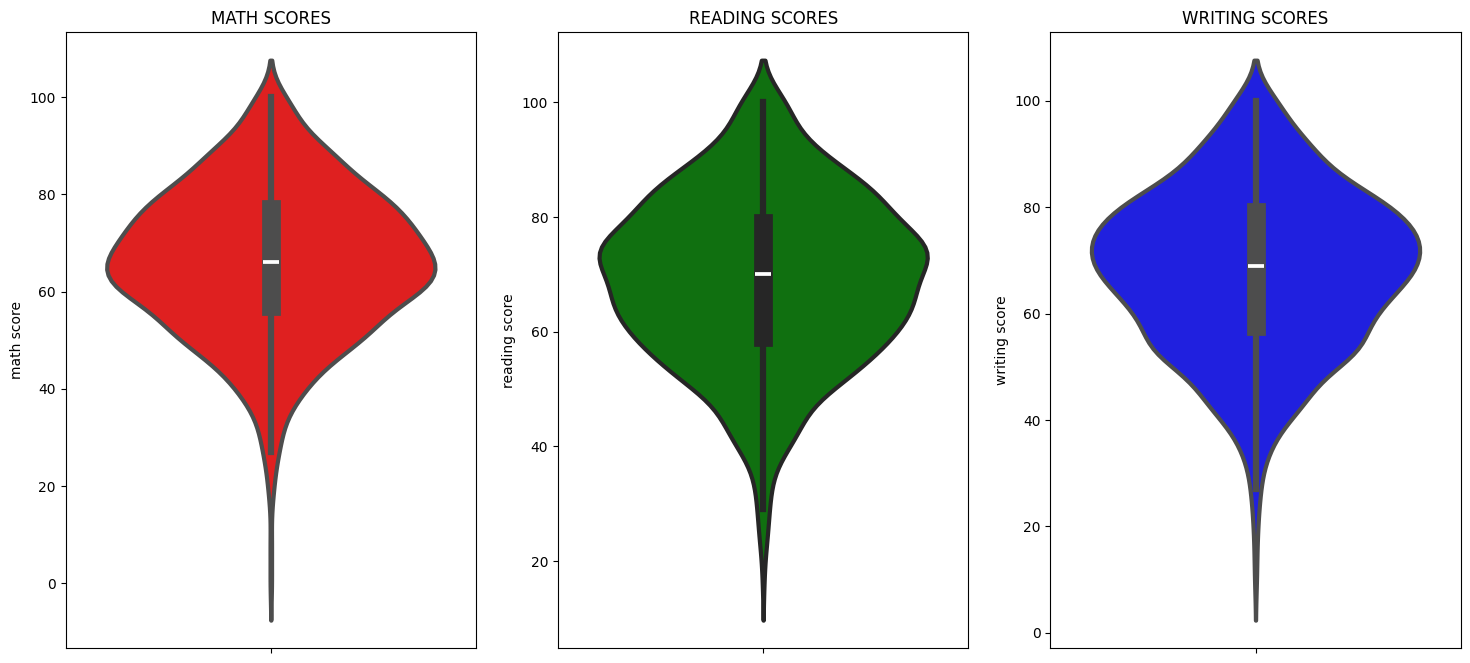

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,3,2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,3,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

##### Insights

* From the above 3 plots it's clearly visible that most of the students score in between 60-80 in Maths, whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

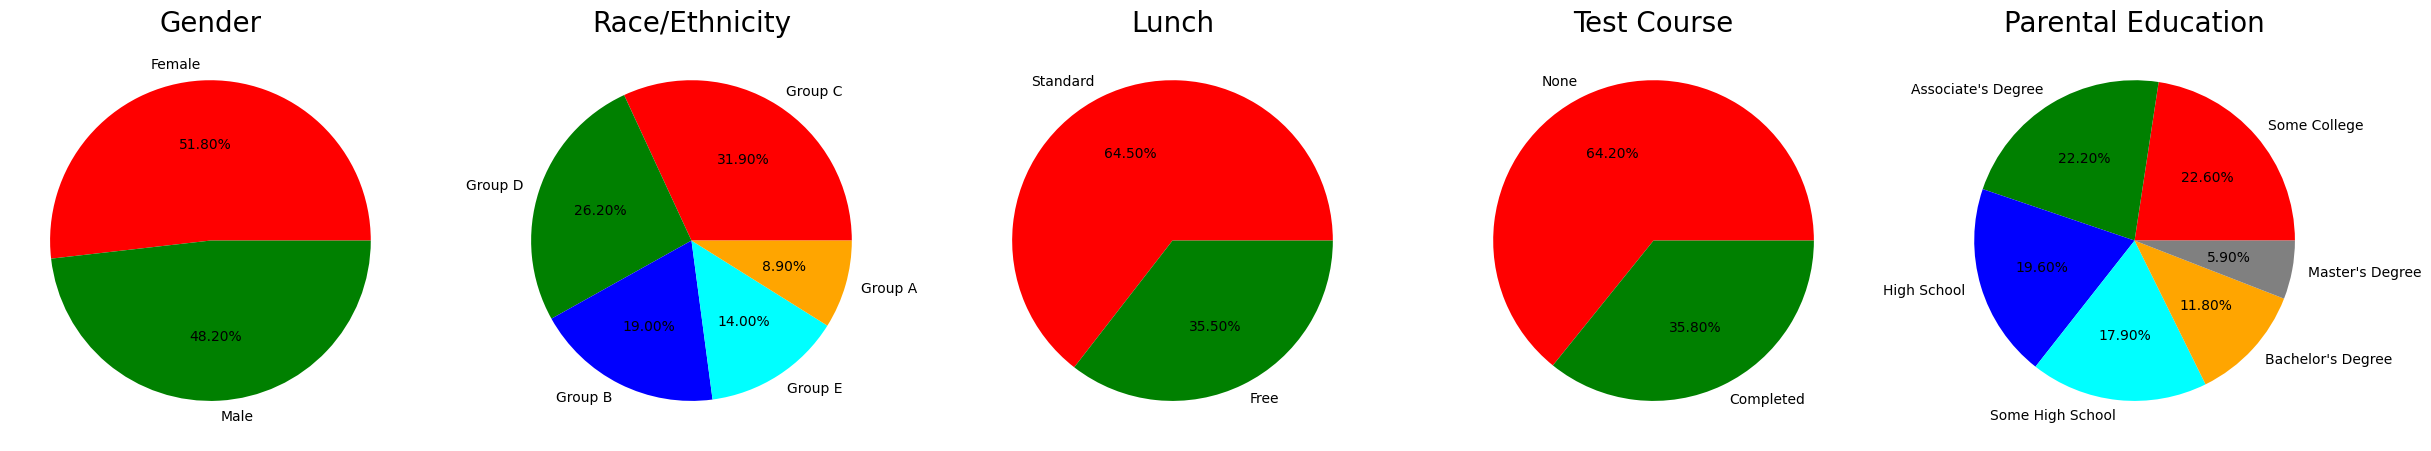

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels =  'Group C', 'Group D','Group B','Group E','Group A'
color = ['red','green', 'blue','cyan','orange']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
plt.pie(df['test preparation course'].value_counts(),
        colors=['red','green'],
        labels=['None','Completed'],
        autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red','green','blue', 'cyan','orange','grey']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

##### Insights

* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization


##### 4.4.1 GENDER COLUMN

* How is distribution of Gender?
* Does gender has any impact on student's performance?

##### UNIVARIATE ANALYSIS (How is distribution of Gender?)

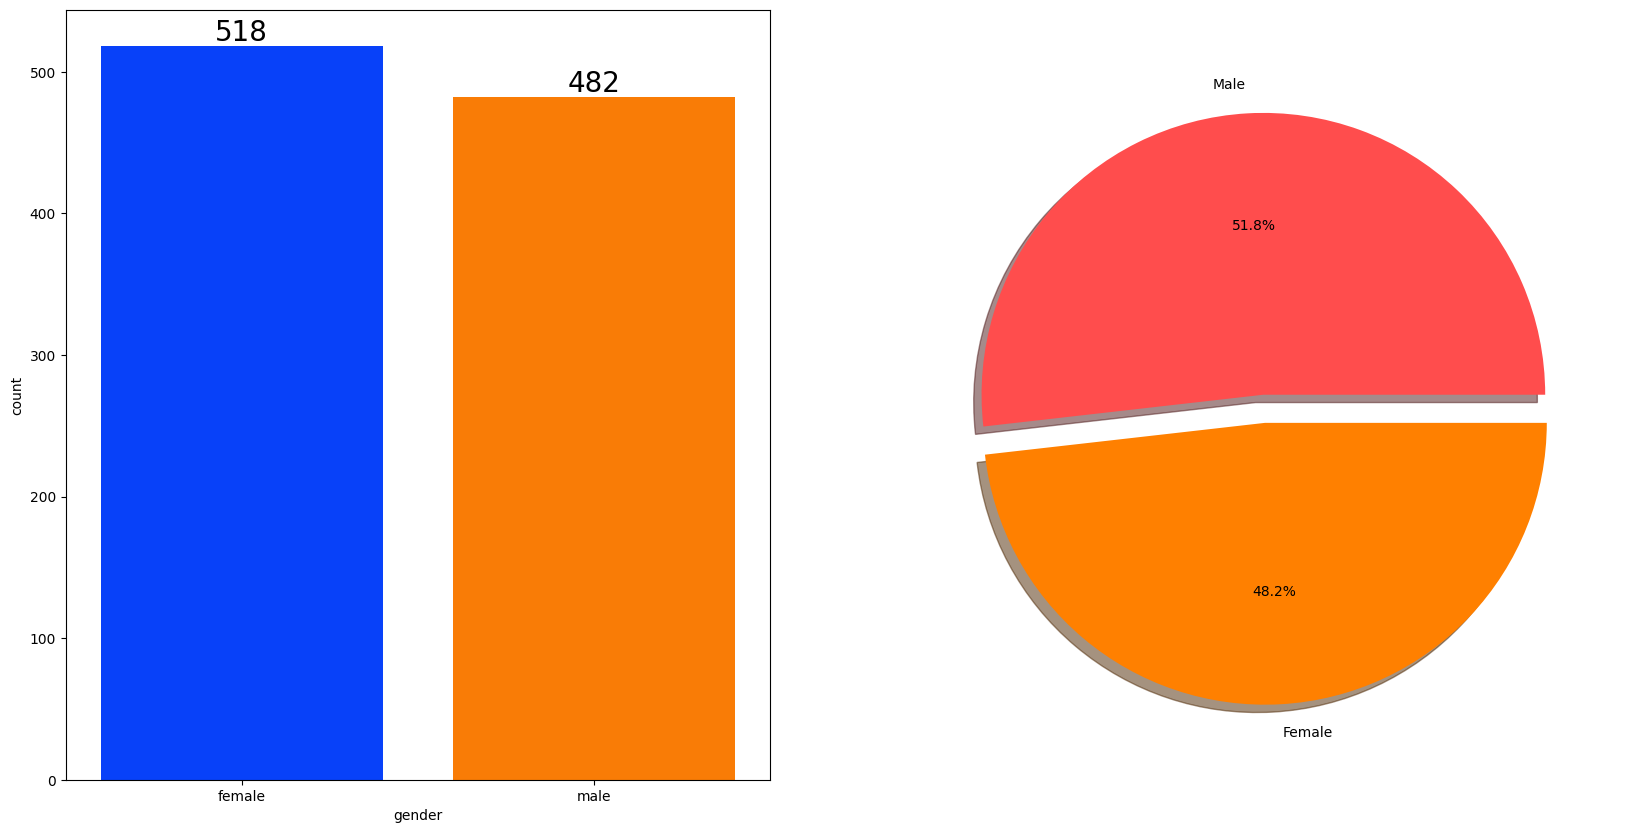

In [23]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df.gender,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df.gender.value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

##### Insights

* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

##### BIVARIATE ANALYSIS ( Does gender has any impact on student's performance ? )

In [24]:
df.groupby(['gender'])[['average','math score']].mean()

,average,math score
gender,,
female,69.569498,63.633205
male,65.837303,68.728216


In [25]:
gender_group = df.groupby(['gender'])[['average','math score']].mean()
gender_group

,average,math score
gender,,
female,69.569498,63.633205
male,65.837303,68.728216


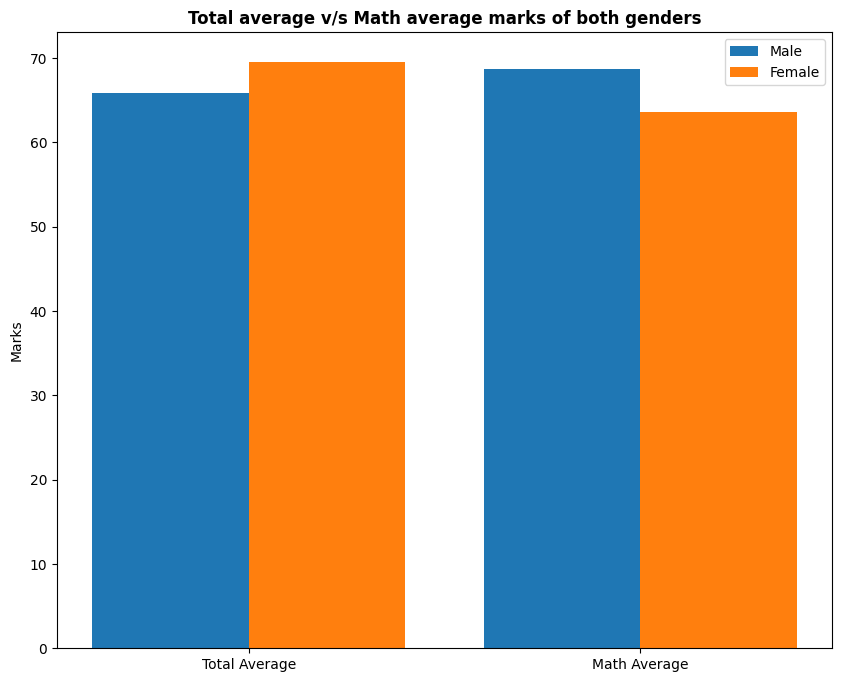

In [26]:
plt.figure(figsize=(10,8))

X = ['Total Average','Math Average']

female_scores = gender_group['average'][0], gender_group['math score'][0]
male_scores = gender_group['average'][1], gender_group['math score'][1]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Total average v/s Math average marks of both genders',fontweight='bold')
plt.legend()
plt.show()

##### Insights
* On an average females have a better overall score than men
* Whereas males have scored higher in Maths.

##### 4.4.2 RACE/ETHNICITY COLUMN

* How is Group wise distribution?
* Does Race/Ethnicity has any impact on student's performance?

##### UNIVARIATE ANALYSIS (How is Group wise distribution?)

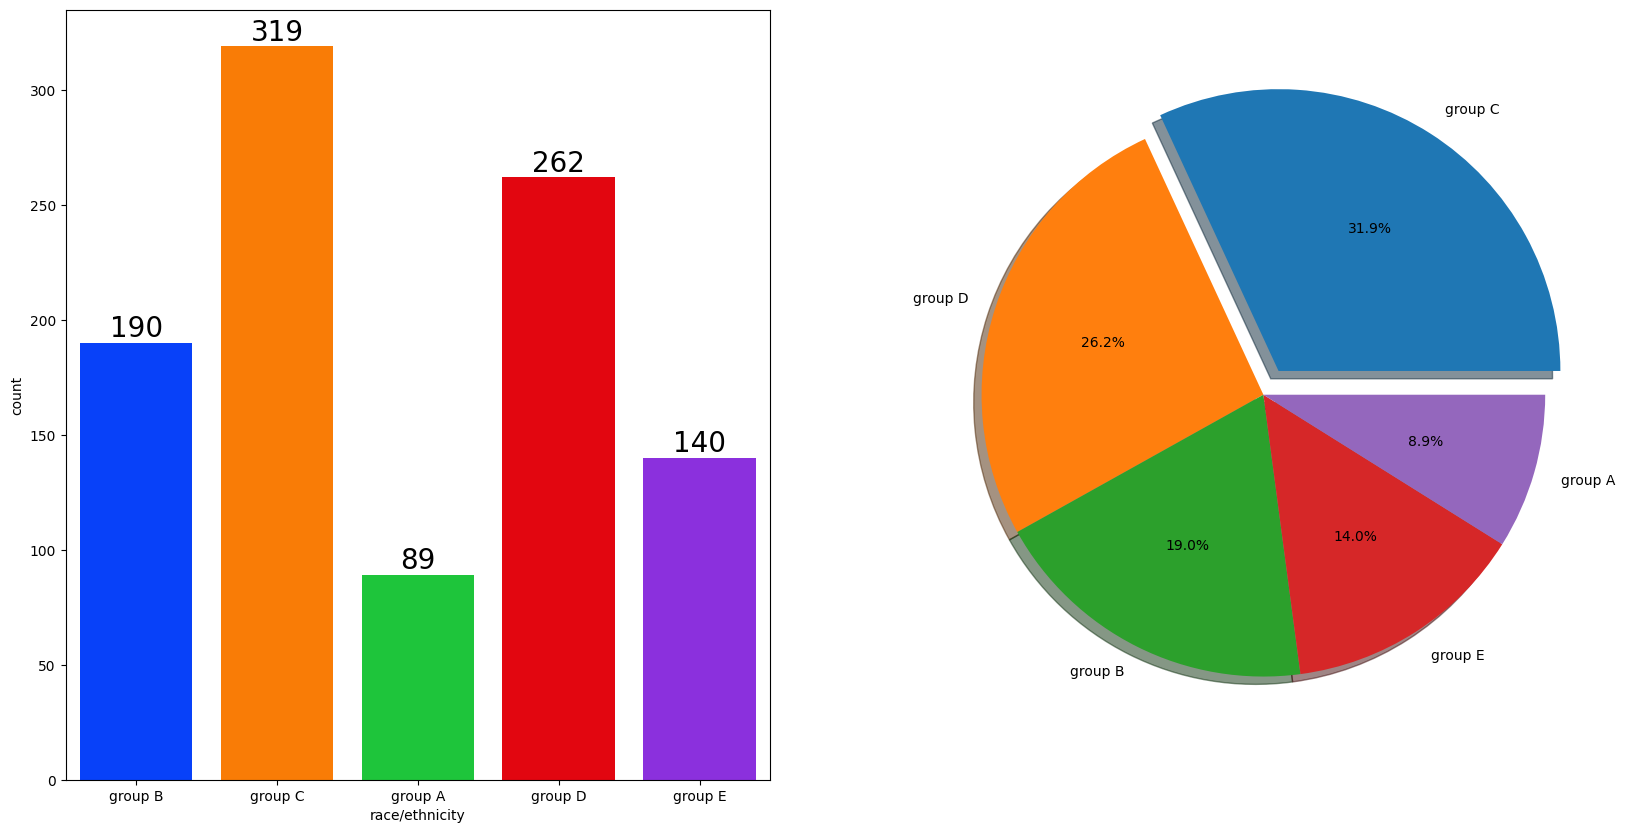

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

##### Insights

* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

##### BIVARIATE ANALYSIS ( Does Race/Ethnicity has any impact on student's performance ? )

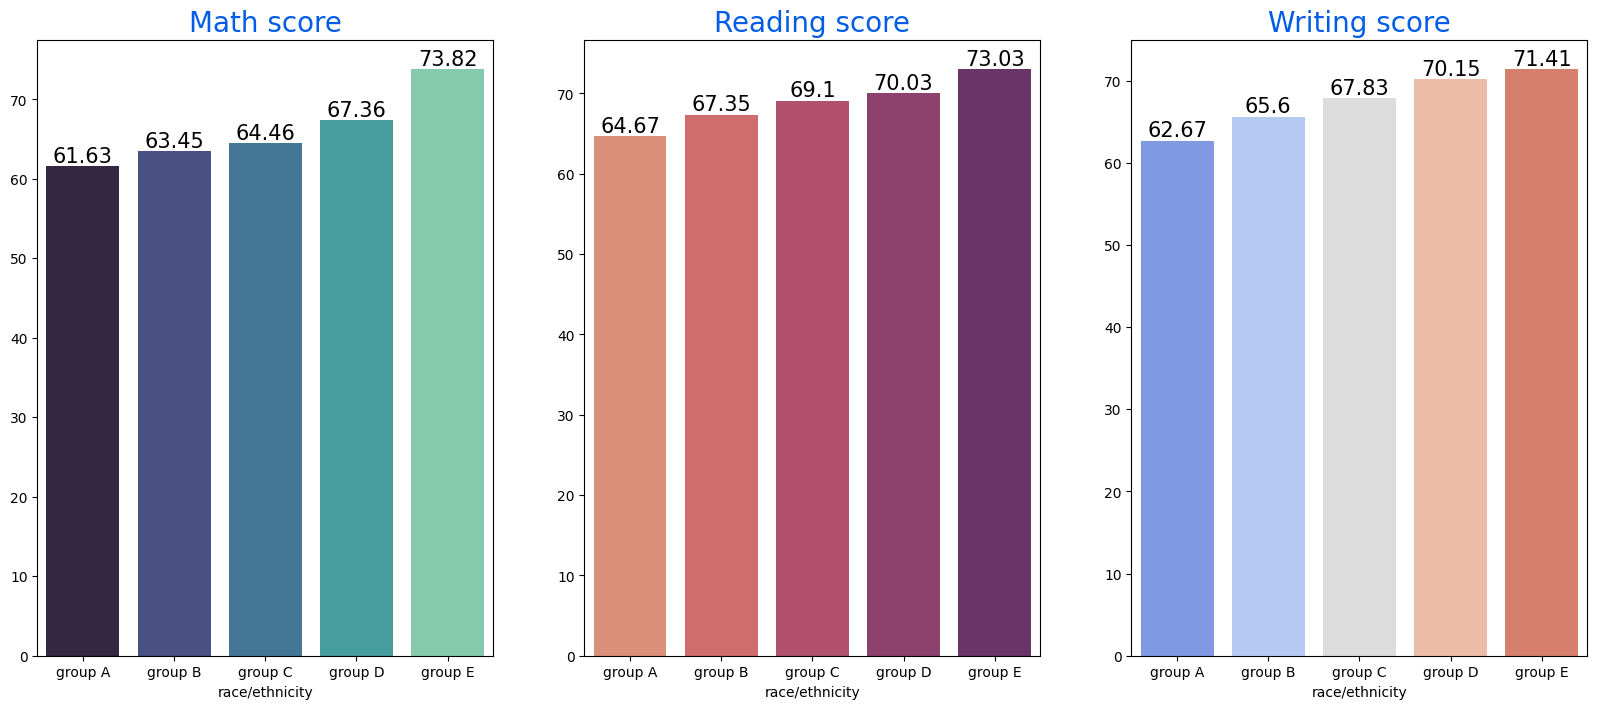

In [28]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().round(2).values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().round(2).values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().round(2).values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

##### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

* What is educational background of student's parents?
* Does Parental education has any impact on student's performance?

##### UNIVARIATE ANALYSIS (What is educational background of student's parents?)

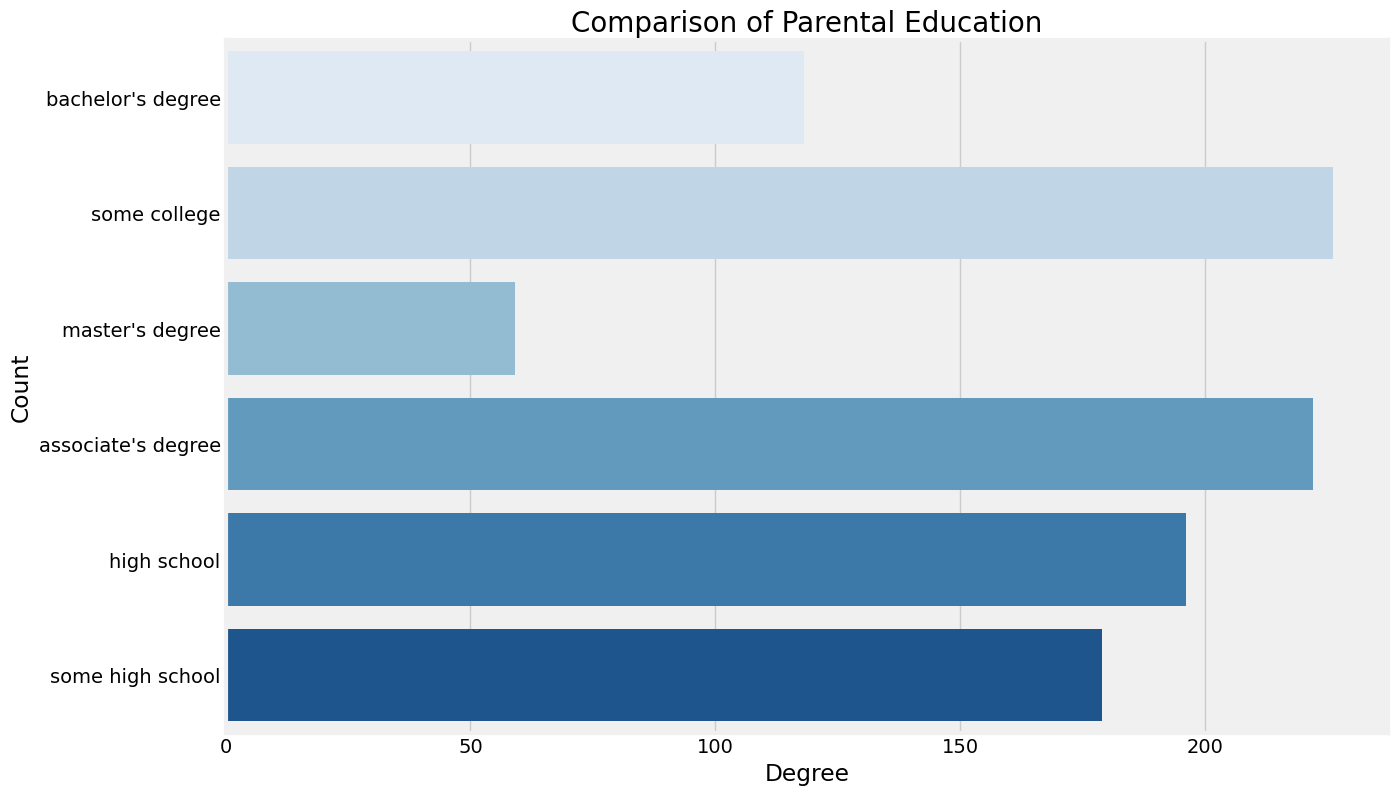

In [29]:
plt.figure(figsize=(15,9))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'],palette='Blues')
plt.title('Comparison of Parental Education',fontweight = 30, fontsize =20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

##### Insights

* Largest number of parents are from some college.

##### BIVARIATE ANALYSIS (Does Parental education has any impact on student's performance?)

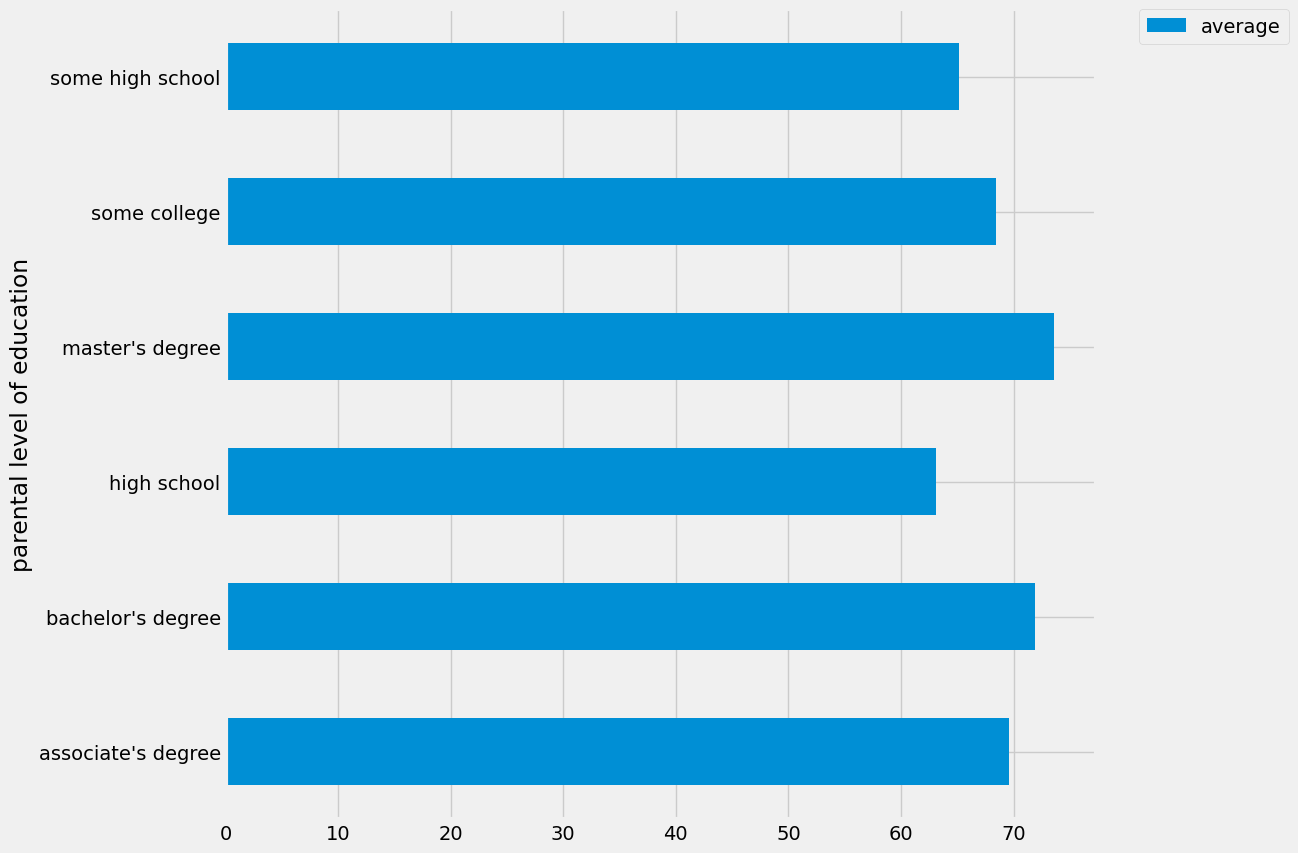

In [30]:
df.groupby('parental level of education')['average'].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
plt.show()


##### Insights

* The score of student whose parents possess master and bachelor level education are higher than others.

##### 4.4.4 LUNCH COLUMN

* Which type of lunch is most common among students ?
* What is the effect of lunch type on test results ?

##### UNIVARIATE ANALYSIS (Which type of lunch is most common among students ?)

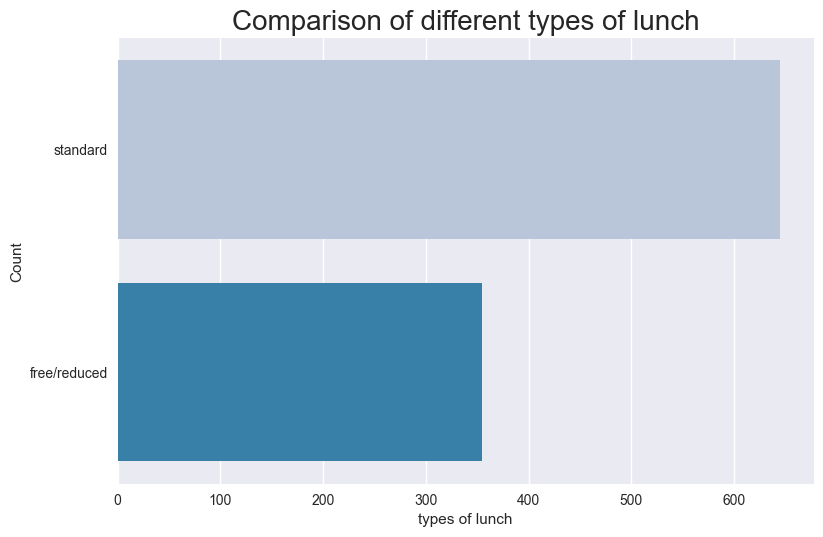

In [31]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch',fontweight = 30, fontsize =20)
plt.xlabel('types of lunch')
plt.ylabel('Count')
plt.show()

##### Insights

* Students being served Standard lunch was more than free lunch

##### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

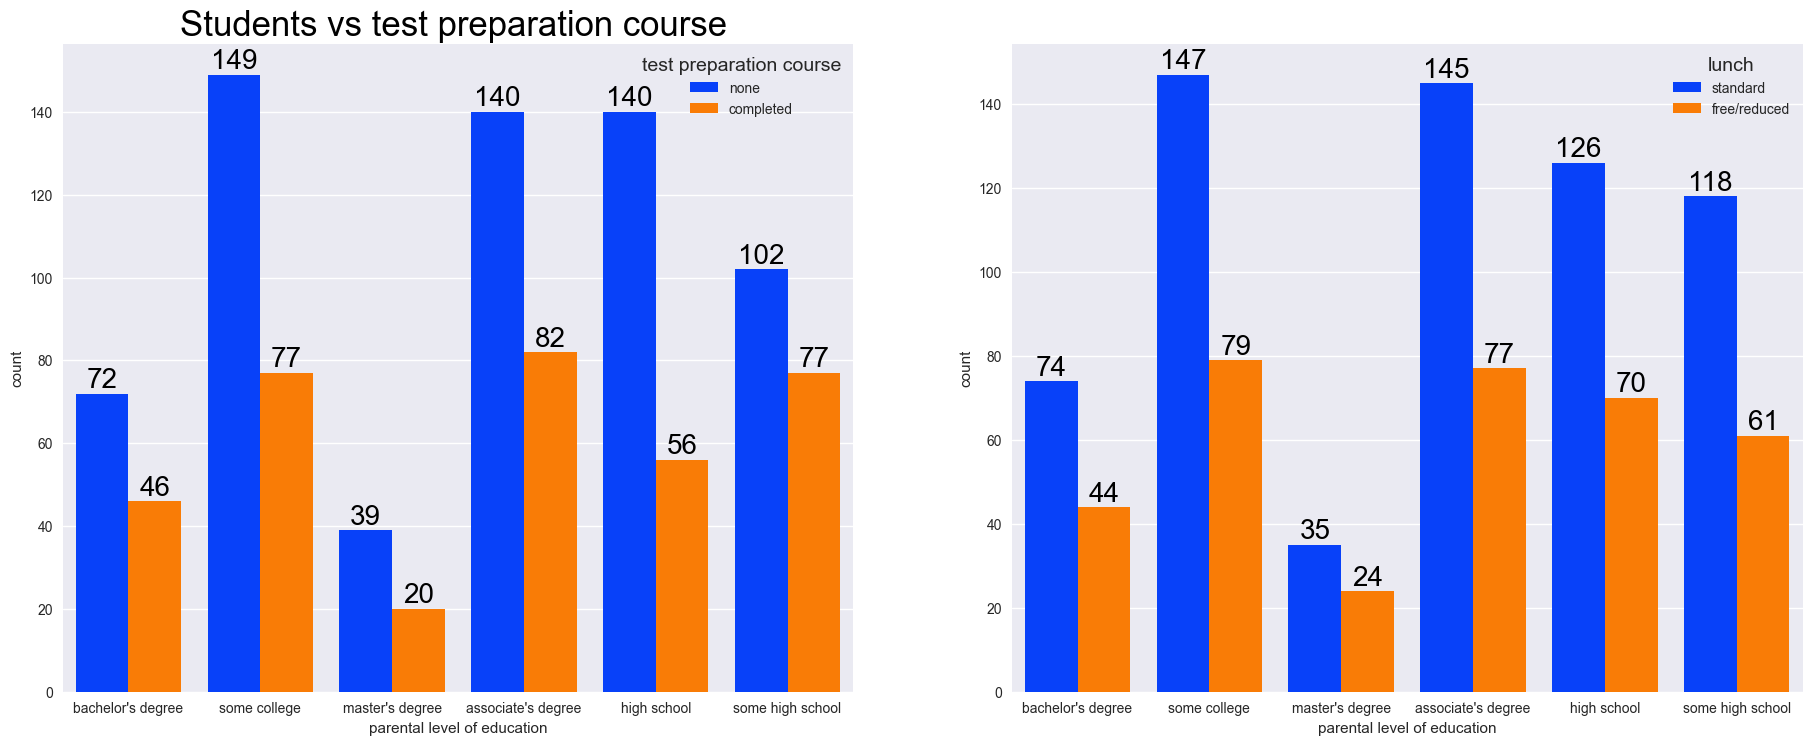

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   


##### Insights

* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

##### 4.4.5 TEST PREPARATION COLUMN

* Does Test preparation course has any impact on student's performance ?

##### BIVARIATE ANALYSIS (Does Test preparation course has any impact on student's performance ?)

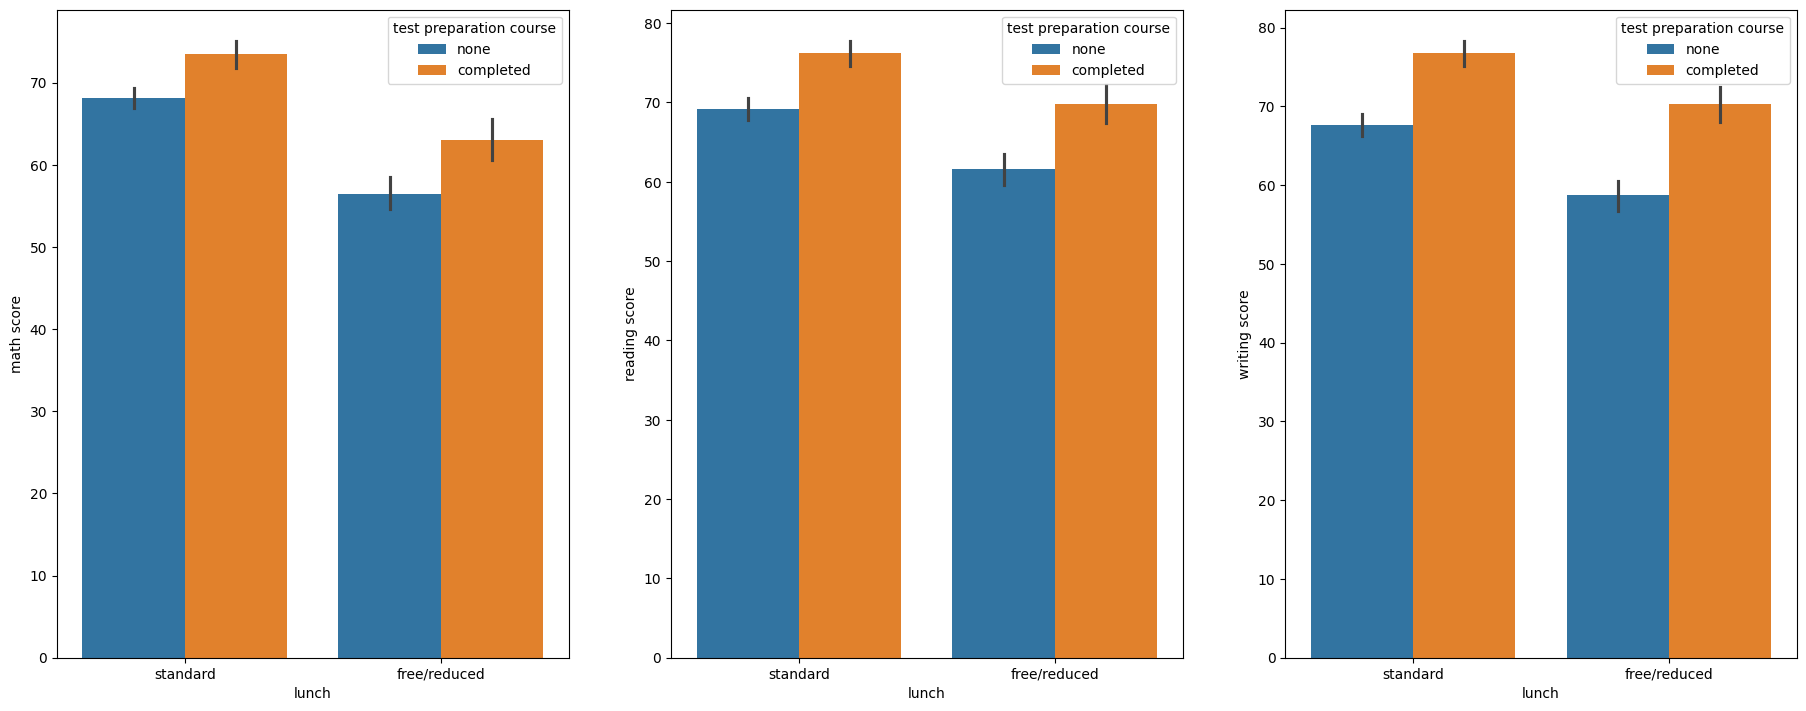

In [42]:
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.subplot(1,3,1)
sns.barplot(x=df['lunch'],y=df['math score'], hue=df['test preparation course'])
plt.subplot(1,3,2)
sns.barplot(x=df['lunch'],y=df['reading score'], hue=df['test preparation course'])
plt.subplot(1,3,3)
sns.barplot(x=df['lunch'],y=df['writing score'], hue=df['test preparation course'])
plt.show()

##### Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

##### 4.4.6 CHECKING OUTLIERS

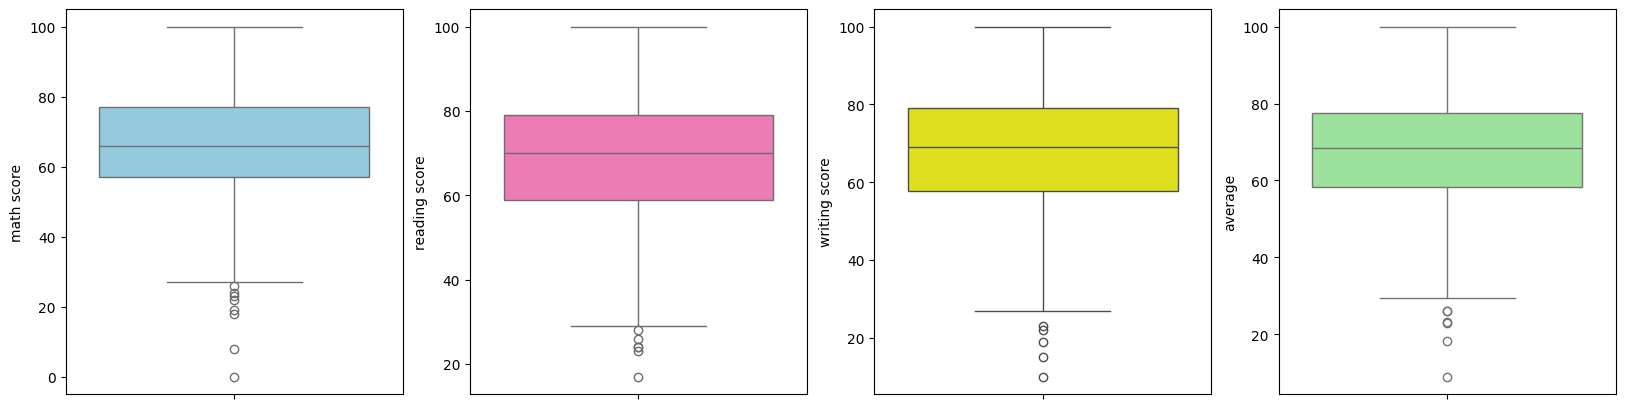

In [45]:
plt.subplots(1,4,figsize=(20,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

##### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

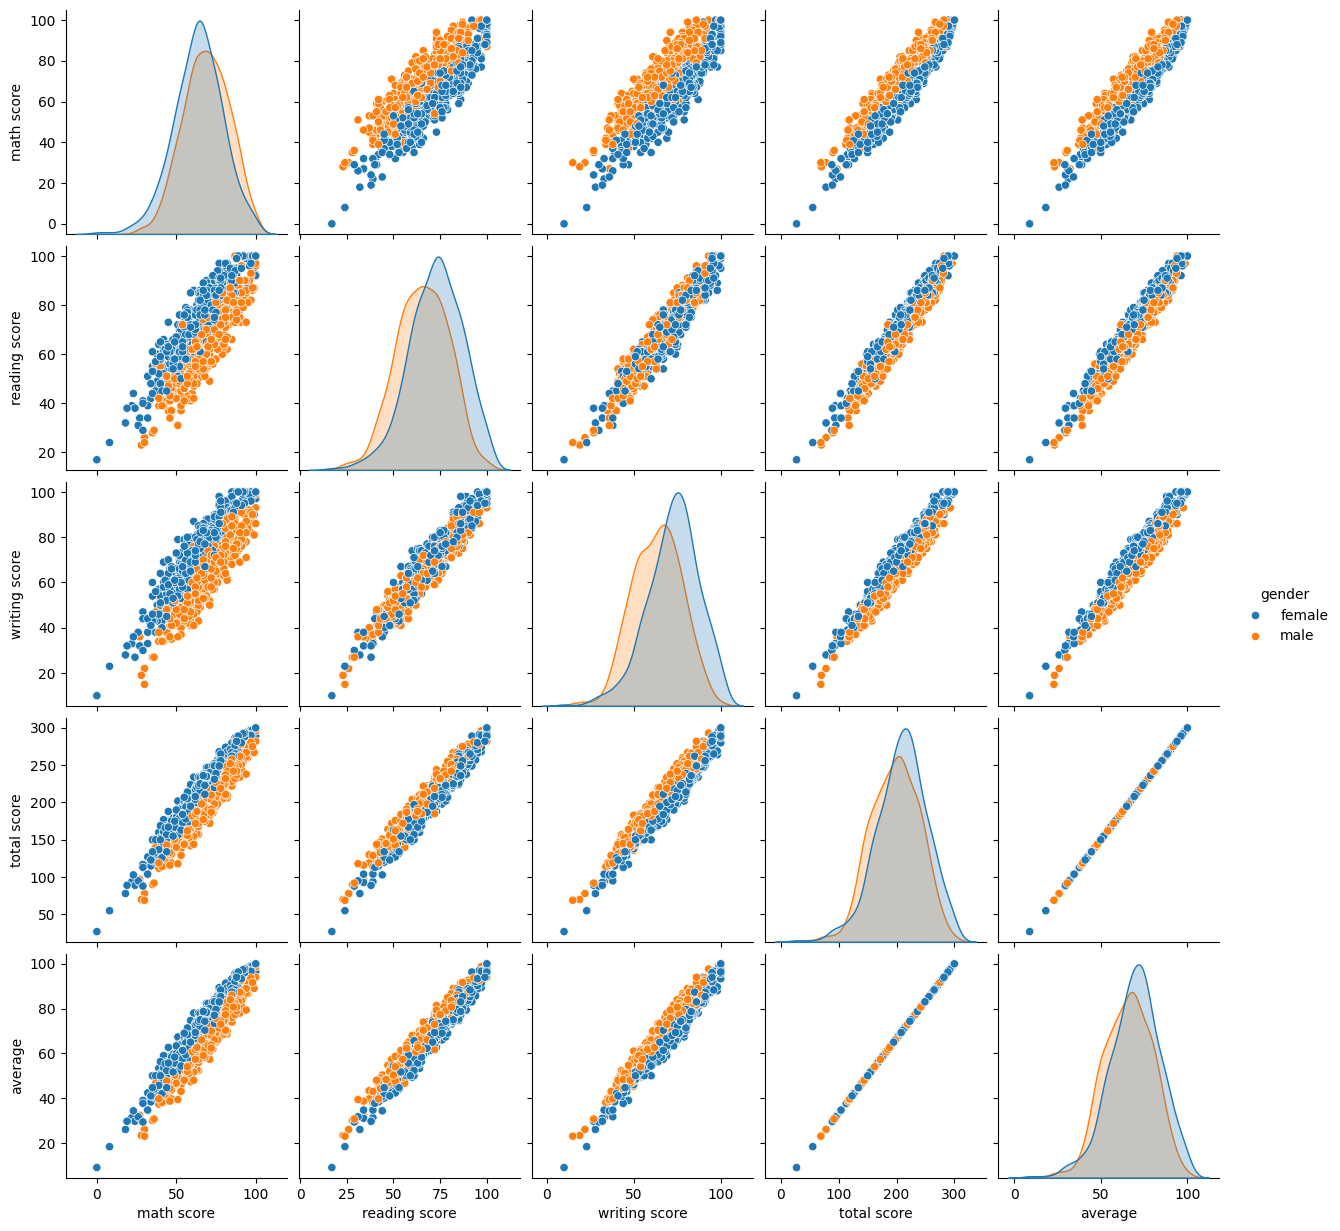

In [46]:

sns.pairplot(df,hue = 'gender')
plt.show()

##### Insights
* From the above plot it is clear that all the scores increase linearly with each other.

#### 5. Conclusions

* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is beneficial.